In [1]:
from __future__ import division, print_function
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
from fitlab.resman import RESMAN
from plotter import Plotter
from tools.tools import load_config
%matplotlib inline

In [2]:
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})

conf = load_config("../fitlab/inputs/upol_hermes_noevolution.py")
conf["resman"] = RESMAN(conf)
conf["resman"].get_residuals(conf["parman"].par)

x_bins = [0.023, 0.047, 0.075, 0.12, 0.2, 0.35, 0.6]
q2_bins = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0, 5.0, 15.0]

raw = pd.read_excel('../database/sidis/expdata/1000.xlsx')

data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "deuteron")]

z_bins = [0.1 , 0.2 , 0.25 , 0.3 , 0.375 , 0.475 , 0.6 , 0.8 , 1.1]

z_labs = {
    0: r"$z \in \left[ 0.1, 0.2 \right]$",
    1: r"$z \in \left( 0.2, 0.25 \right]$",
    2: r"$z \in \left( 0.25, 0.3 \right]$",
    3: r"$z \in \left( 0.3, 0.375 \right]$",
    4: r"$z \in \left( 0.375, 0.475 \right]$",
    5: r"$z \in \left( 0.475, 0.6 \right]$",
    6: r"$z \in \left( 0.6, 0.8 \right]$",
    7: r"$z \in \left( 0.8, 1.1 \right]$"
}

raw["qT"] = raw["pT"] / raw["z"]
data["qT"] = data["pT"] / data["z"]

col_lab = "pT"
sub_xlabel = r"$p_T$ (GeV)"

big_xlabel = "$x$"
big_ylabel = "$Q^2$"

title = "HERMES"

sub_ylabel = r"$M_{D}^{\pi^+}$"

fig_kw = {"figsize": (13, 13)}

plotter = Plotter(raw=raw,
                  data=data,
                  col_lab=col_lab,
                  q2_bins=q2_bins,
                  x_bins=x_bins,
                  z_bins=z_bins,
                  z_labs=z_labs,
                  sub_xlabel=sub_xlabel,
                  sub_ylabel=sub_ylabel,
                  big_xlabel=big_xlabel,
                  big_ylabel=big_ylabel,
                  title=title,
                  fig_kw=fig_kw
                  )

plotter.raw_plot_kw["alpha"] = 0.4
 
plotter.raw_plot_kw["markersize"] = 2
plotter.raw_plot_kw["linewidth"] = 2

plotter.data_plot_kw["alpha"] = 1.0
plotter.data_plot_kw["markersize"] = 2.4
plotter.data_plot_kw["linewidth"] = 2
plotter.data_plot_kw["markeredgecolor"] = (0.8392156862745098,
                                           0.15294117647058825,
                                           0.1568627450980392)  # To increase visibility
plotter.data_plot_kw["markeredgewidth"] = 0.16

plotter.legend_kw["bbox_to_anchor"] = (1.0 / plotter.ncols, 1 - 1.5 / plotter.nrows)
plotter.legend_kw["loc"] = "center"

loading sidis data sets 1007

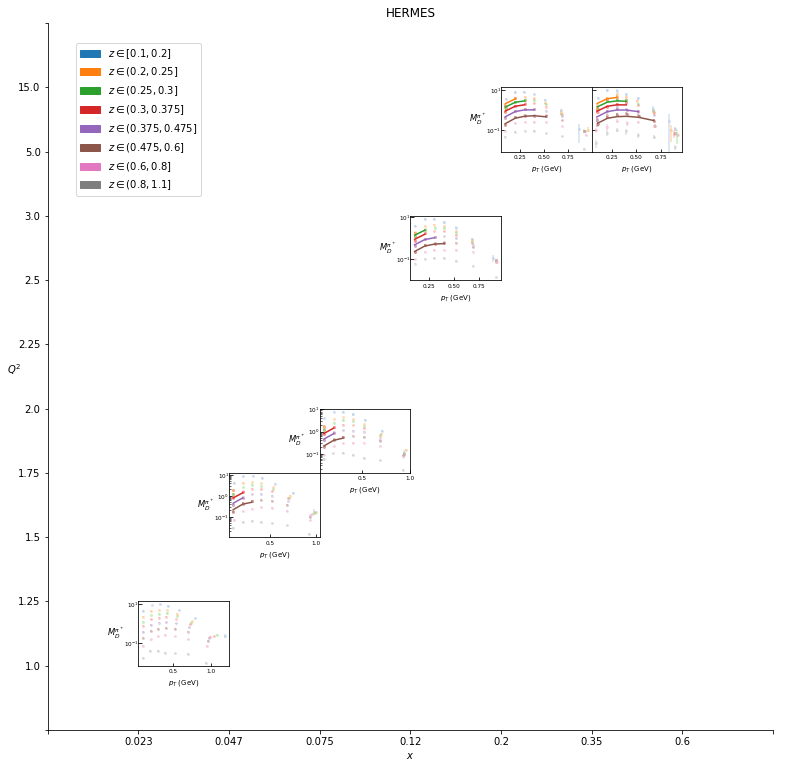

In [3]:
plotter.plot()

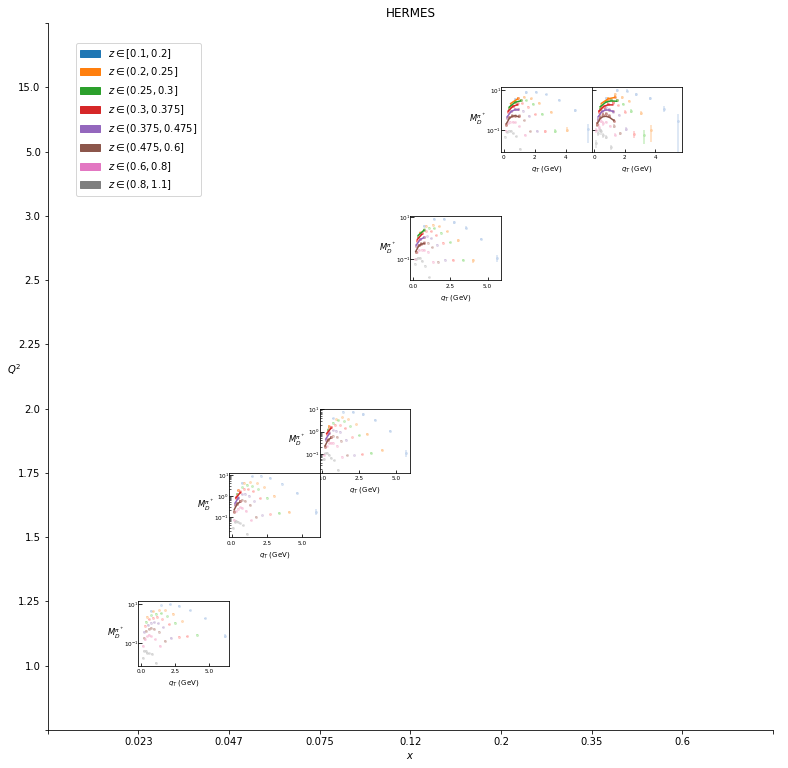

In [4]:
plotter.col_lab = "qT"
plotter.sub_xlabel = r"$q_T$ (GeV)"

plotter.plot()